In [27]:
import cftime
from matplotlib import pylab
import xarray as xr
import numpy
import datetime
import time
import glob, os
import sys
import math
import netCDF4 as netcdf
import multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# uncomment for RCP8.5 hres data
run_ensemble    = 1 # ensemble number must be provided as script argument
run_year_start  = 2092 # [2002, 2092]
experiment_name = 'b.e10.B_RCP8.5_CO2_CAM5.f02_t12.started_'+str(run_year_start)+'-12.'+str(run_ensemble).zfill(3)
directory_data  = f'/projects/0/prace_imau/prace_2013081679/cesm1_0_4/f02_t12/{experiment_name}/OUTPUT/atm/hist/3h/'
stream          = 'h1'
directory       = f'/home/jasperdj/files_rene/RCP.started_{run_year_start}.{run_ensemble:03d}/'
gridfile        = '/home/jasperdj/files_rene/Atmosphere_0_25_DX_DY_AREA.nc'
NOUT            = 8 # number of time steps per output file (one day)

In [5]:
files = glob.glob(directory_data+experiment_name+'.cam2.'+stream+'.*.nc')
files.sort() #Sort the files on date
files[0], files[-1]

('/projects/0/prace_imau/prace_2013081679/cesm1_0_4/f02_t12/b.e10.B_RCP8.5_CO2_CAM5.f02_t12.started_2092-12.001/OUTPUT/atm/hist/3h/b.e10.B_RCP8.5_CO2_CAM5.f02_t12.started_2092-12.001.cam2.h1.2092-12-01-10800.nc',
 '/projects/0/prace_imau/prace_2013081679/cesm1_0_4/f02_t12/b.e10.B_RCP8.5_CO2_CAM5.f02_t12.started_2092-12.001/OUTPUT/atm/hist/3h/b.e10.B_RCP8.5_CO2_CAM5.f02_t12.started_2092-12.001.cam2.h1.2097-12-31-10800.nc')

In [11]:
ds = xr.open_dataset(files[60])
dsg = xr.open_dataset(gridfile)

In [22]:
dudy = (ds.U850.data[:,2:,1:-1] - ds.U850.data[:,:-2,1:-1])/(2*dsg.DY.data[None,1:-1,1:-1])
dvdx = (ds.V850.data[:,1:-1,2:] - ds.V850.data[:,1:-1,:-2])/(2*dsg.DX.data[None,1:-1,1:-1])
RV850 = dvdx - dudy

In [37]:
dudy = (ds.U250.data[:,2:,1:-1] - ds.U250.data[:,:-2,1:-1])/(2*dsg.DY.data[None,1:-1,1:-1])
dvdx = (ds.V250.data[:,1:-1,2:] - ds.V250.data[:,1:-1,:-2])/(2*dsg.DX.data[None,1:-1,1:-1])
RV250 = dvdx - dudy

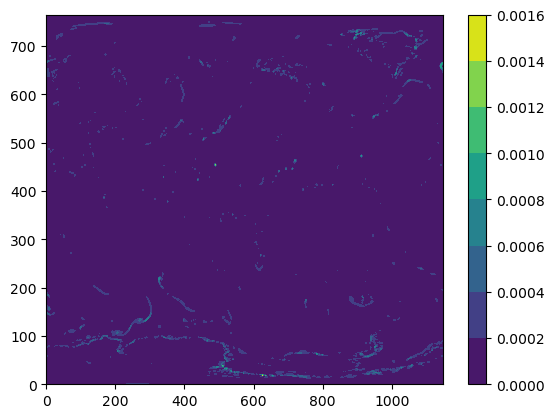

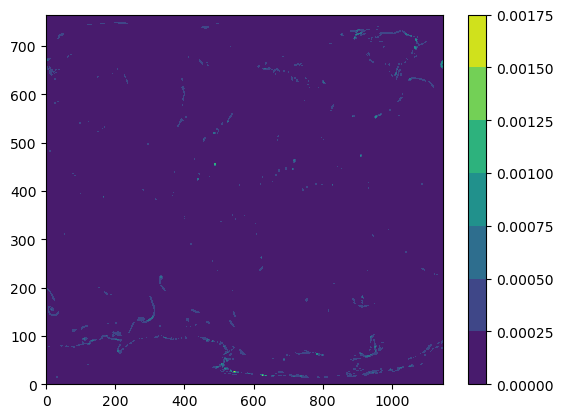

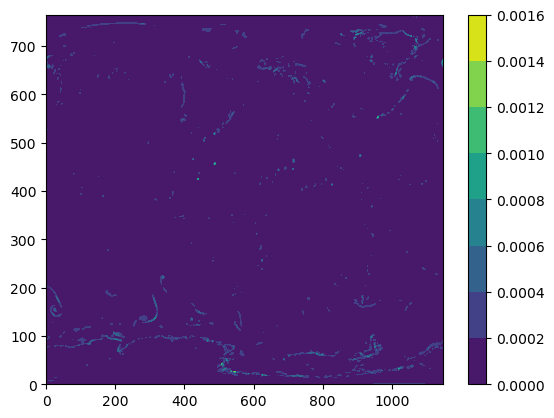

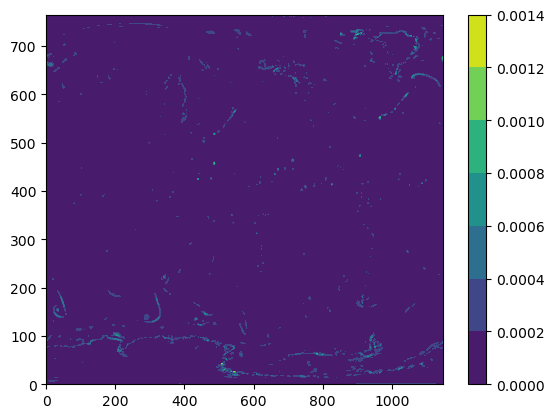

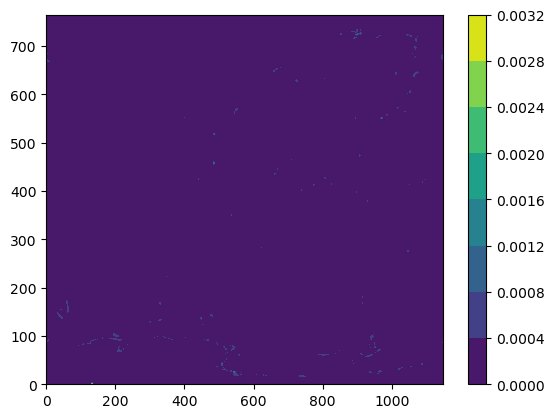

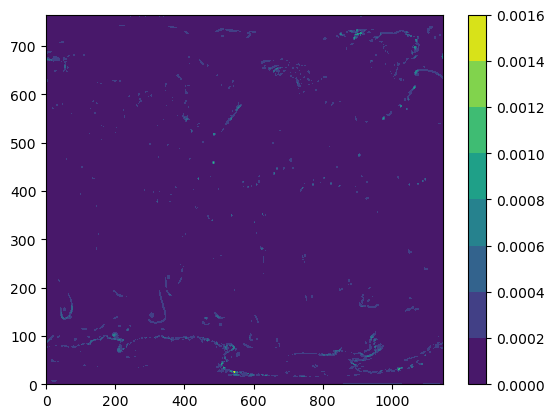

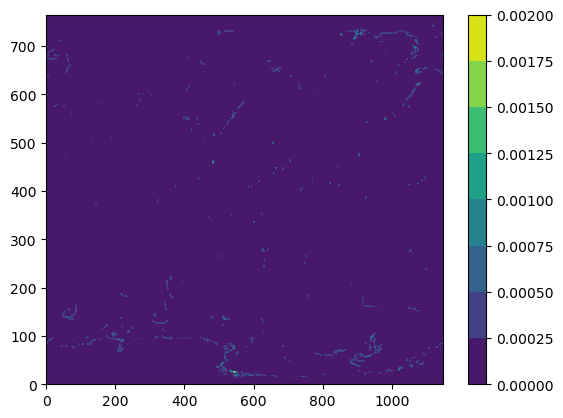

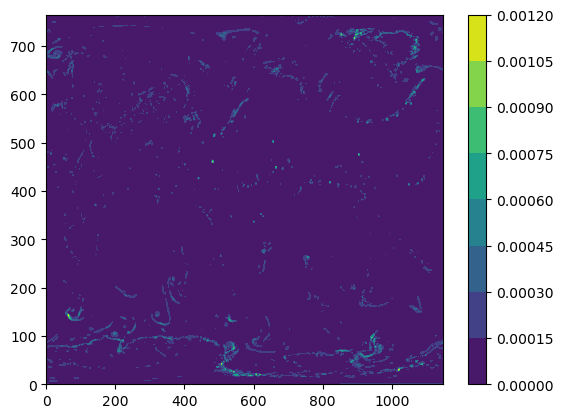

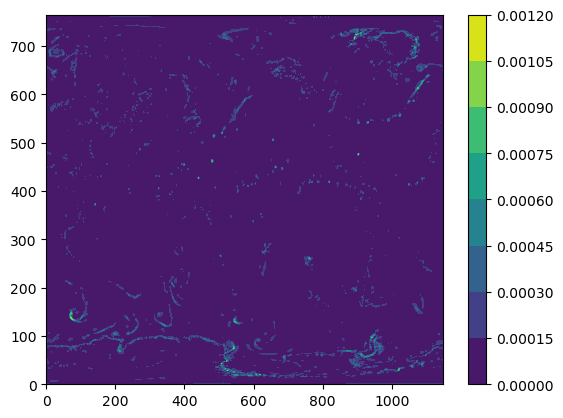

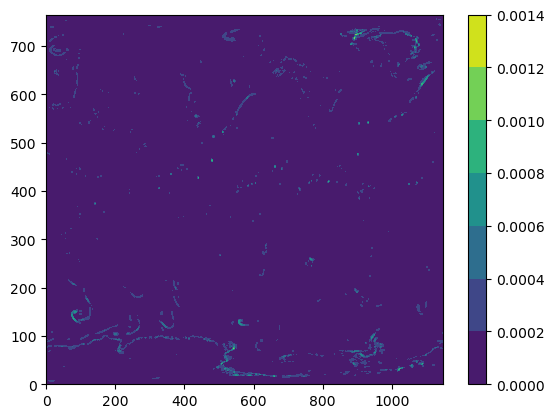

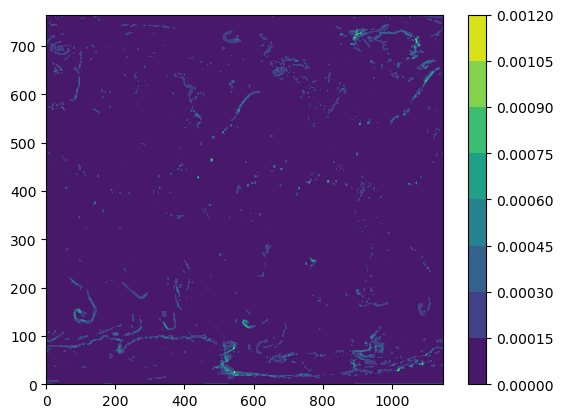

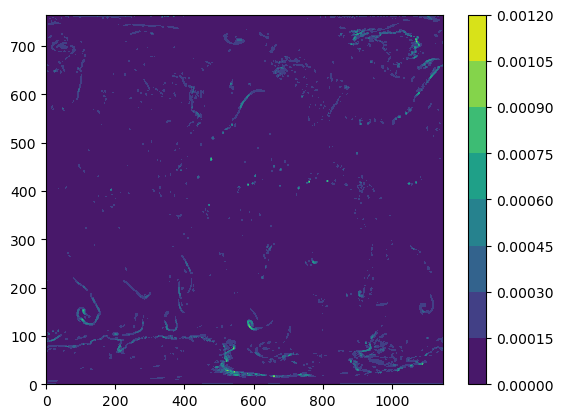

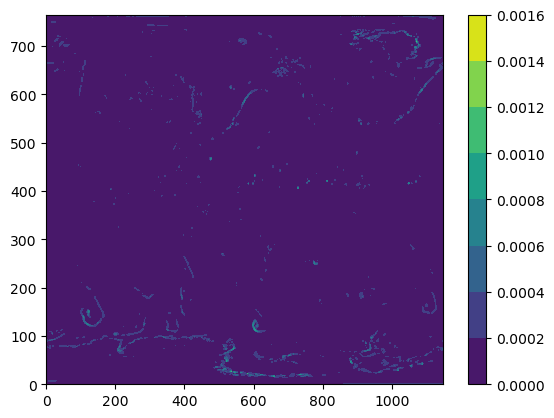

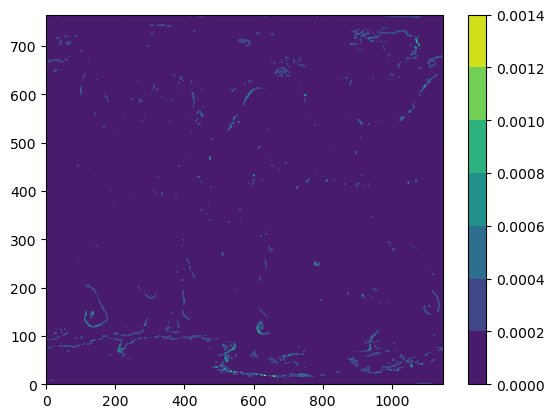

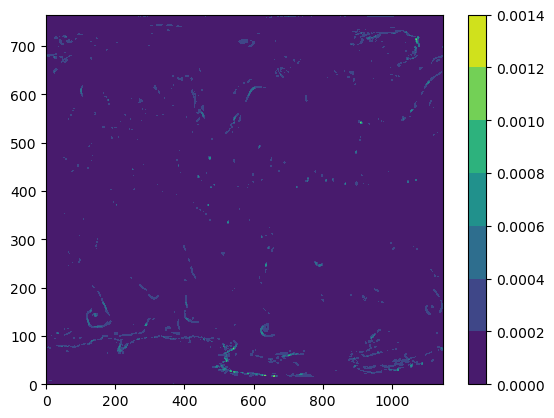

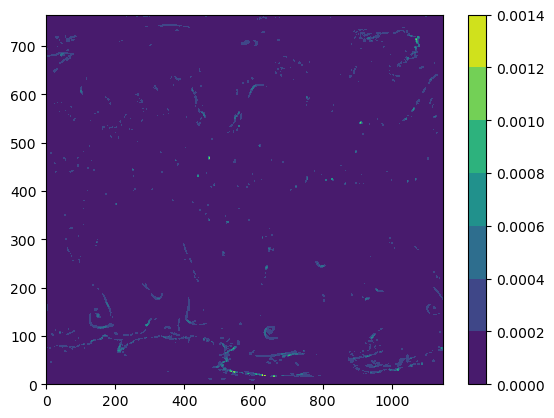

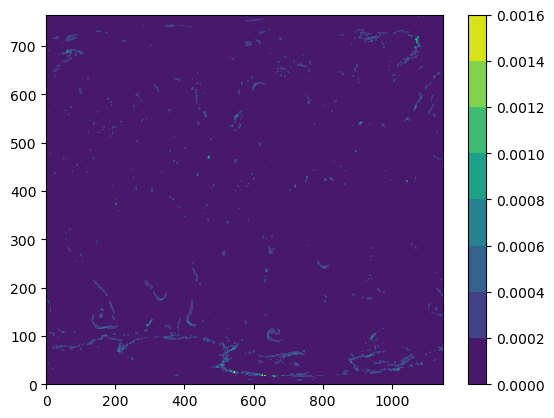

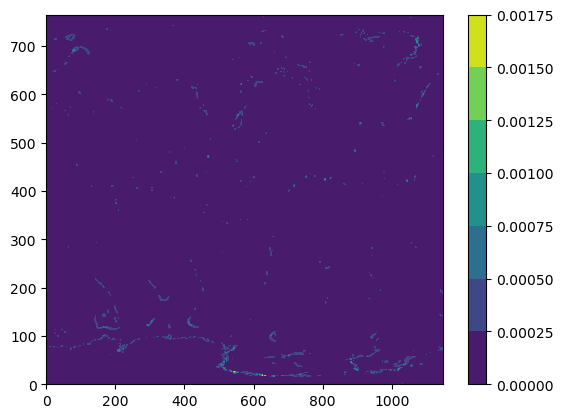

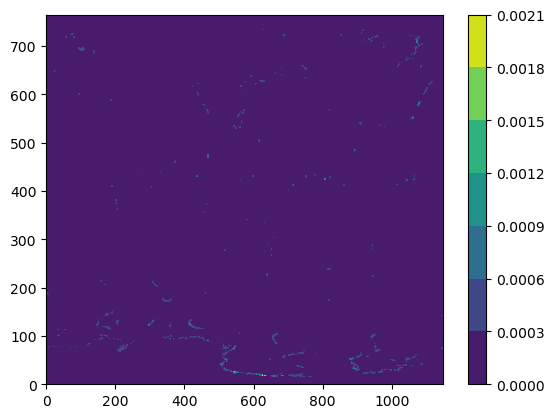

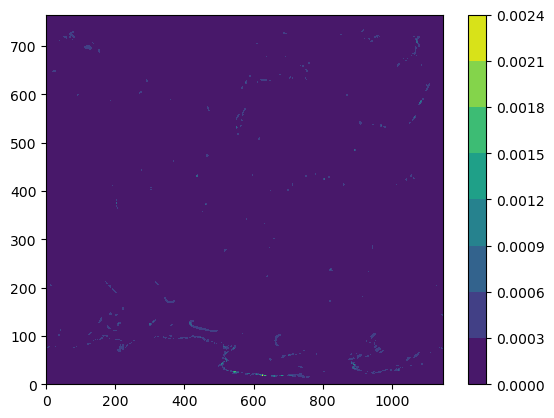

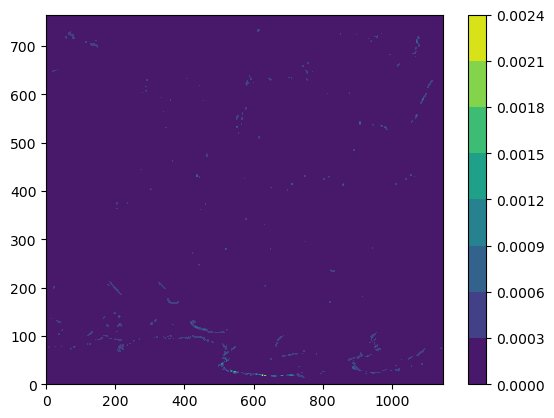

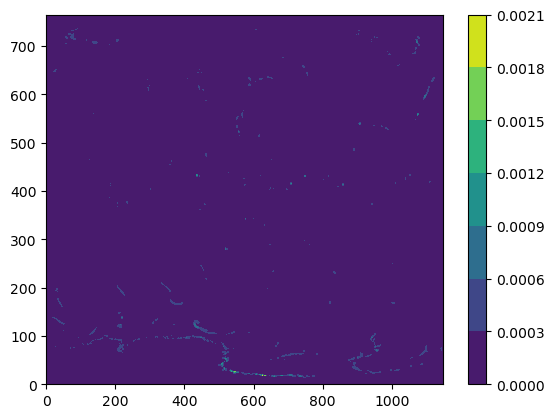

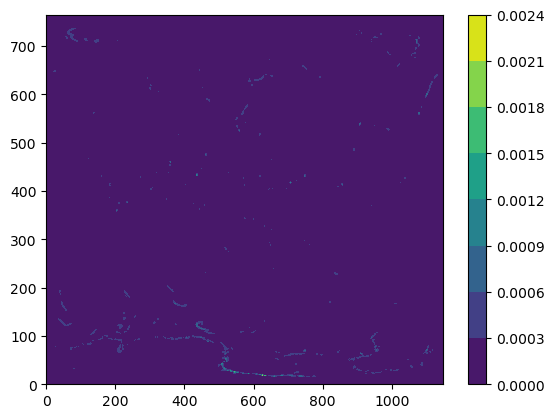

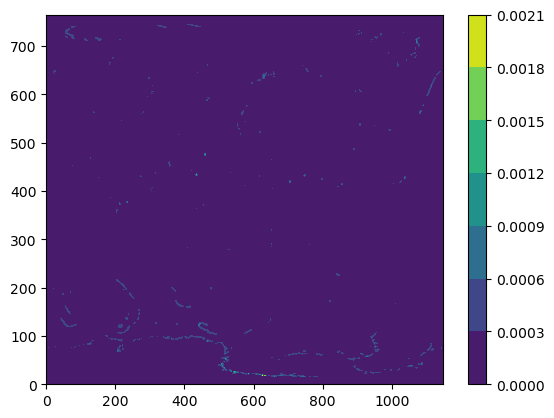

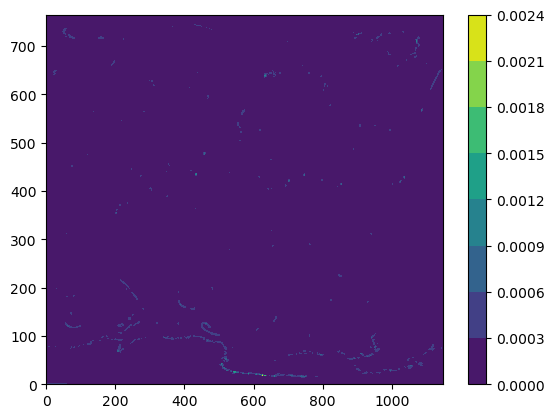

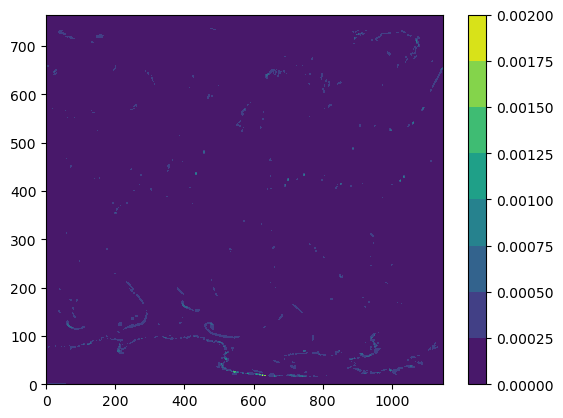

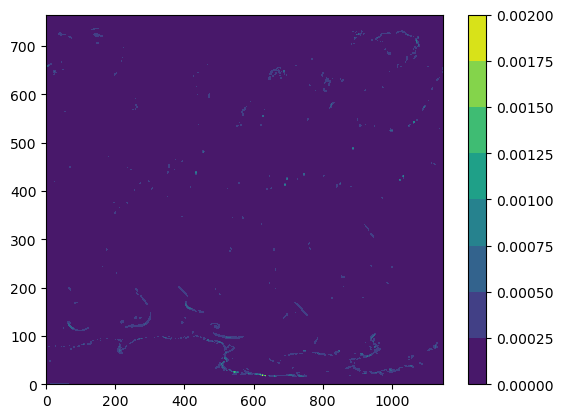

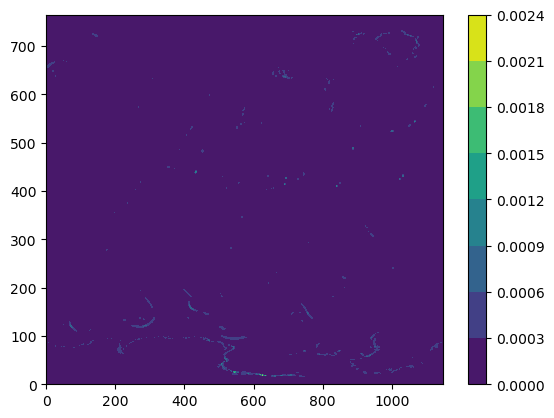

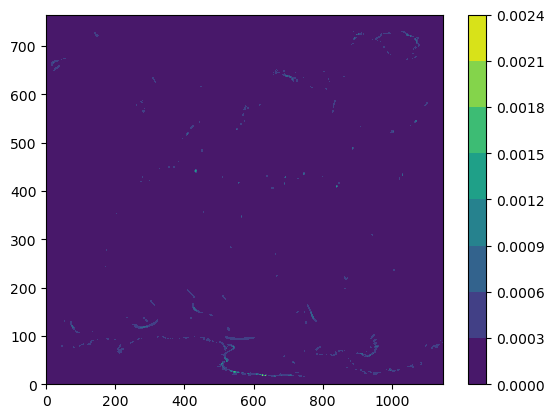

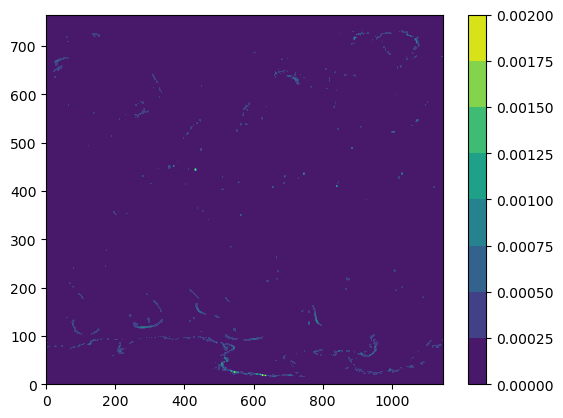

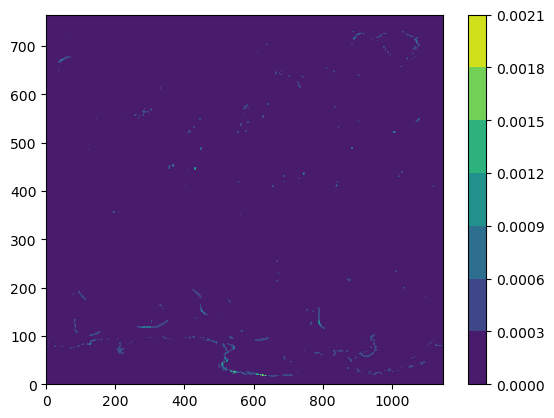

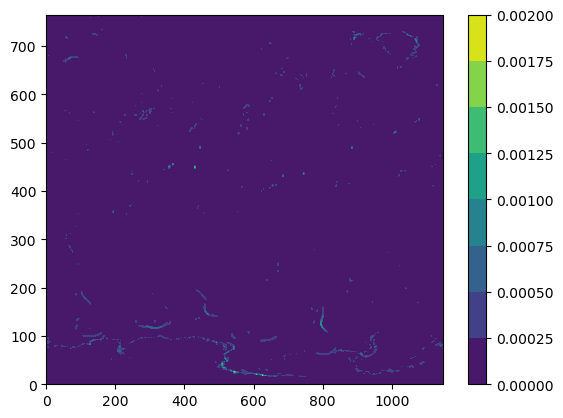

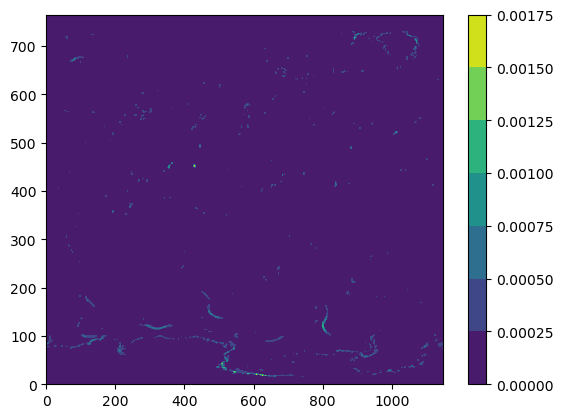

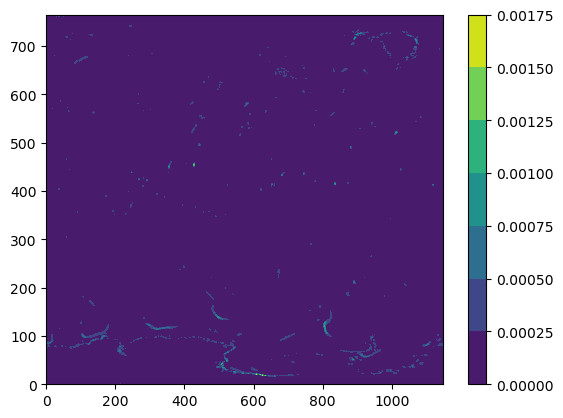

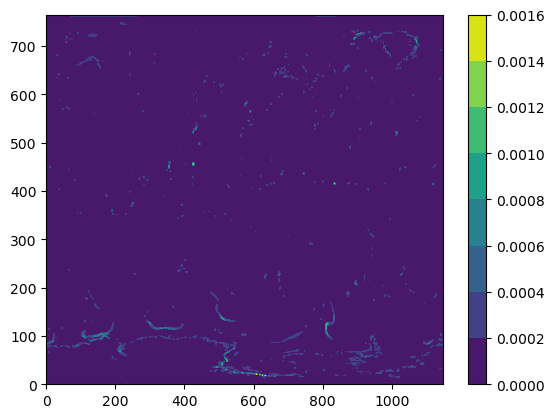

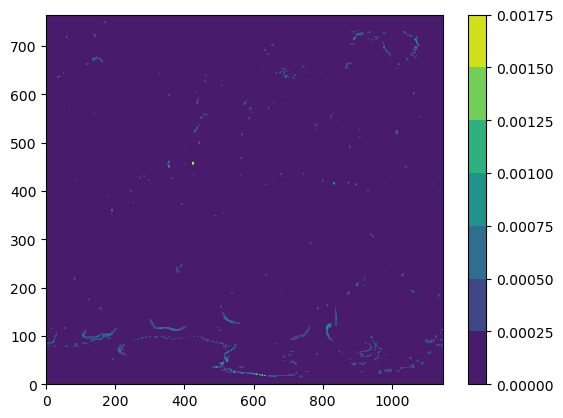

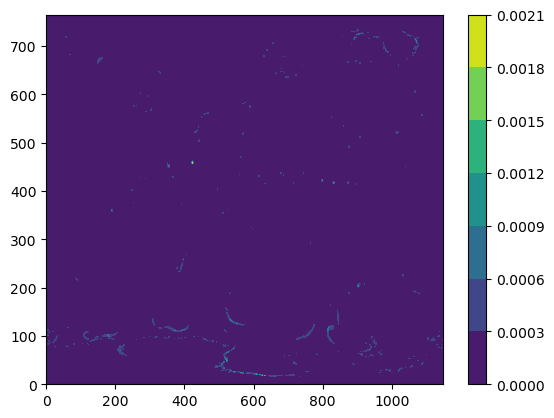

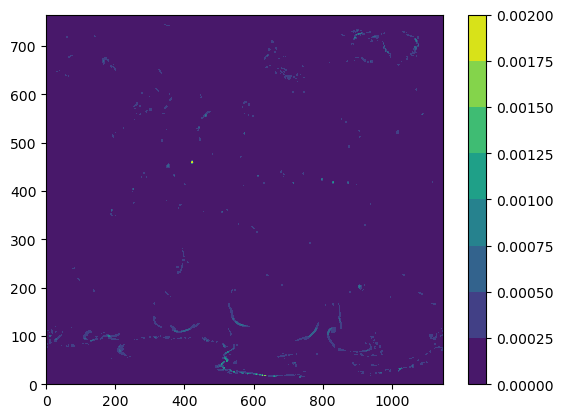

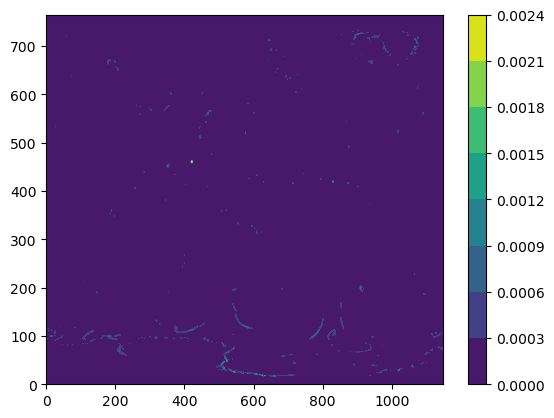

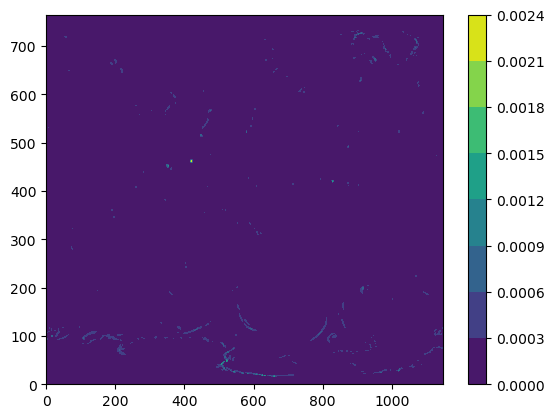

In [43]:
for t in range(len(RV850)):
    plt.contourf(numpy.abs(RV850[t]))
    plt.colorbar()
    plt.show()

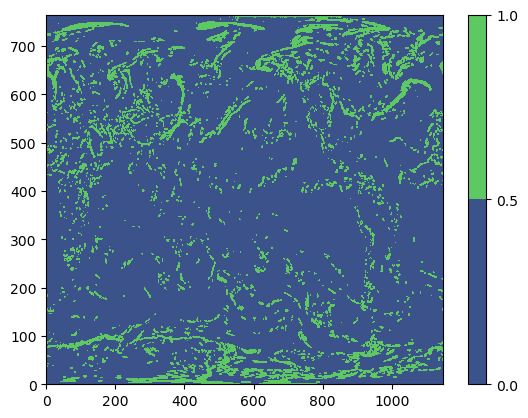

In [41]:
plt.contourf((numpy.abs(RV850[0])>6e-5) * ((RV850[0]-RV250[0])>6e-5))
plt.colorbar()
plt.show()